# Dvoslojne neuronske mreže

Data je sledeća arhitektura neuronske mreže:


$$Linear_{1} \xrightarrow{} f \xrightarrow{} Linear_{2} \xrightarrow{} g$$


gde $Linear_{i}(x) = W^{(i)}x + b^{(i)}$ je i-ta afina transformacija a $f, g$ su nelinearne aktivacione funkcije. Kada se ulaz $x \in R^{n}$ dovede u mrežu, $\hat{y} \in R^{K} $ se dobija kao izlaz.

# Regresioni zadatak

Treba da rešite zadatak regresije. Biramo $f(.) = (.)^{+} = ReLU(.) $ i $g$ je funkcije identiteta. Da bi trenirali ovu mrežu, uzimamo usrednjenu kvadratnu greške (MSE) za funkciju cene $l_{MSE} (\hat{y},y) = ||\hat{y} - y ||^{2}$ gde je $y$ ciljani izlaz.

a) Dajte naziv i matematički opišite 5 koraka u programiranju koje ćete napraviti da bi istrenirali ovaj model sa PyTorch bibliotekom koristeći Stohastički gradijentni silazak (SGD) na jednom skupu (batch) podataka.

### odgovor
1. Inicijalizacija - Inicijalizujemo sve težine i biase malim slučajnim vrednostima.
2. Propagacija unapred - Propuštamo trening podatke kroz mrežu i računamo izlaze (procenjene vrednosti za ulaze).
3. Računanje funkcije cene - Računamo MSE za 2 vektora. Jedan predstavlja prethodno izračunate procene, a drugi predstavlja stvarne vrednosti ulaza.
4. Propagacija unazad - Računa se izvod funkcije cene po svim težinama.
5. Ažuriranje koeficijenata - Koeficijenti se ažuriraju primenom metode SGD.

Matematički opis:
2.  Propagacija unapred

*   Izlazi neurona iz prvog sloja: $\textbf{h}^{(1)}=f(\textbf{W}^{(1)}\textbf{x}+b^{(1)})=f(\textbf{z}^{(1)})$
*   Izlazi neurona iz drugog sloja: $\hat{\textbf{y}}=g(\textbf{W}^{(2)}\textbf{h}^{(1)}+b^{(2)})=g(\textbf{z}^{(2)})$

3. Računanje funkcije cene:  $l_{MSE} (\hat{\textbf{y}},\textbf{y}) = ||\hat{\textbf{y}} - \textbf{y} ||^{2}$

4. Propagacija unazad: $\frac{\partial l}{\partial \textbf{W}_{j}^{(r)}}=\frac{\partial l}{\partial z_{j}^{(r)}}\frac{\partial z_{j}^{(r)}}{\partial \textbf{W}_{j}^{(r)}}$, gde je $r$ redni broj sloja, a $j$ redni broj neurona u $r$-tom sloju. Isto tako i za bias (izvod loss funkcije po bias-ima).

5. Ažuriranje koeficijenata: $\textbf{W}_{j (novo)}^{(r)} = \textbf{W}_{j (staro)}^{(r)} - \alpha\frac{\partial l}{\partial \textbf{W}_{j}^{(r)}}$. 
I ažuriranje biasa na isti način.
   



b) Za jednu tačku $(x,y)$, napišite sve izlaze i ulaze za prolaz unapred svakog sloja, Možete koristiti samo varijable $x,y,W^{(1)},b^{(1)},W^{(2)},b^{(2)}$ u svom odgovoru. (Primetite da $Linear_{i}(x) = W^{i}x + b^{i} $)

| Sloj | Ulaz | Izlaz |
| :- | -: | :-: |
| $Linear_{1}$ |  | |
| $f$ |  |  |
| $Linear_{2}$ |  |  |
| $g$ |  |  |
| $loss$ |  |  |


### odgovor

\begin{array}{|c|c|} \hline
Sloj & Ulaz & Izlaz  \\ \hline
Linear_{1} & x & W^{(1)}x + b^{(1)} \\
f & W^{(1)}x + b^{(1)} & f(W^{(1)}x + b^{(1)})  \\
Linear_{2} & f(W^{(1)}x + b^{(1)}) & W^{(2)}(f(W^{(1)}x + b^{(1)})) + b^{(2)}  \\ 
g & W^{(2)}(f(W^{(1)}x + b^{(1)})) + b^{(2)} & \hat{y}=g(W^{(2)}(f(W^{(1)}x + b^{(1)})) + b^{(2)})  \\
loss & y, \hat{y} & ||\hat{y} - y ||^{2}  \\  \hline
\end{array}




c) Zapišite gradijente izračunate iz prolaza unazad. Možete korisiti sledeće varijable $x, y, W^{(1)},b^{(1)},W^{(2)},b^{(2)},\frac{\partial l}{\partial \hat{y}}, \frac{\partial z_{2}}{\partial z_{1}},\frac{\partial \hat{y}}{\partial z_{3}}$ u svom odgovoru, gde su $z_{1},z_{2},z_{3},\hat{y}$ izlazi iz $Linear_{1}, f, Linear_{2}, g$.

| Parametar | Gradijent |
| :-        |        -: | 
| $W^{(1)}$   |       | 
| $b^{(1)}$   |           |
| $W^{(2)}$   |           |  
| $b^{(2)}$   |           |    


### odgovor
\begin{array}{|c|c|} \hline
Parametar & Gradijent  \\ \hline
W^{(1)} & \frac{\partial z_{2}}{\partial z_{1}}W^{(2)T}\frac{\partial \hat{y}}{\partial z_{3}}\frac{\partial l}{\partial \hat{y}}x^T\\
b^{(1)} &  \frac{\partial z_{2}}{\partial z_{1}}W^{(2)T}\frac{\partial \hat{y}}{\partial z_{3}}\frac{\partial l}{\partial \hat{y}}\\
W^{(2)} &  \frac{\partial \hat{y}}{\partial z_{3}}\frac{\partial l}{\partial \hat{y}}f(W^{(1)}x + b^{(1)})^T \\ 
b^{(2)} &  \frac{\partial \hat{y}}{\partial z_{3}} \frac{\partial l}{\partial \hat{y}}\\  \hline
\end{array}




d) Pokažite nam elemente $\frac{\partial z_{2}}{\partial z_{1}}$, $\frac{\partial \hat{y}}{\partial z_{3}}$ i $\frac{\partial l}{\partial \hat{y}}$(Pazite na dimenzionalnost)

### odgovor

  \begin{equation}
    \frac{\partial z_{2}}{\partial z_{1}}=\frac{\partial max(0,z1)}{\partial z_{1}}=
    \begin{cases}
      1, & \ z_{1}>0 \\
      0, & \text{inace}
    \end{cases}
  \end{equation}

Ovo je u slučaju da su $z_{1}$ i $z_{2}$ skalari. Pošto su $z_{1}$ i $z_{2}$ vektori dimenzije $M$x$1$, gde je $M$ broj neurona u prvom sloju, dobija se da je izvod dimenzije $M$x$M$.


  \begin{equation}
    \frac{\partial \hat{y}}{\partial z_{3}}=\frac{\partial g(z_{3})}{\partial z_{3}}=1
  \end{equation}

Ovo je u slučaju da su $z_{3}$ i $\hat{y}$ skalari. Pošto su  $z_{3}$ i $\hat{y}$ vektori dimenzije $K$x$1$, dobija se da je izvod dimenzije $K$x$K$.

  \begin{equation}
    \frac{\partial l}{\partial \hat{y}}=\begin{bmatrix} \frac{\partial l}{\partial \hat{y_{1}}} \\ \frac{\partial l}{\partial \hat{y_{2}}} \\.\\.\\.\\  \frac{\partial l}{\partial \hat{y_{K}}} \end{bmatrix} = \begin{bmatrix} \frac{2}{K}(\hat{y_{1}}-y_{1}) \\ \frac{2}{K}(\hat{y_{2}}-y_{2}) \\.\\.\\.\\ \frac{2}{K}(\hat{y_{K}}-y_{K}) \end{bmatrix} 
  \end{equation}

  Funkacija cene je skalar, dok je $\hat{y}$ vektor dimenzije $K$x$1$, pa je i izvod dimenzije $K$x$1$.
  

# Klasifikacioni zadatak

Treba da rešite zadatak više-klasne klasifikacije, zato postavljamo $f,g = \sigma$, logistički sigmoid $\sigma(z)=(1+ exp(-z))^{-1}$

a) Šta treba da promenite u jednačinama pod b), c) i d) pod pretpostavkom da koristimo istu funkciju cene da bismo trenirali ovu mrežu?

### odgovor
Treba izmeniti aktivacione funkcije tj. umesto relu i funkcije identiteta treba koristiti logistički sigmoid. Formule pod b) i c) ostaju iste, s tim što smatramo da koristimo sigmoid za funkcije f i g. 

d)
 \begin{equation}
    \frac{\partial z_{2}}{\partial z_{1}}=\frac{\partial f(z_{1})}{\partial z_{1}}=\frac{\partial (1+e^{-z1})^{-1}}{\partial z_{1}}=e^{-z1}(1+e^{-z1})^{-2}
  \end{equation}

Ovo je u slučaju da su $z_{1}$ i $z_{2}$ skalari. Pošto su $z_{1}$ i $z_{2}$ vektori dimenzije $M$x$1$, gde je $M$ broj neurona u prvom sloju, dobija se da je izvod dimenzije $M$x$M$.


 \begin{equation}
    \frac{\partial \hat{y}}{\partial z_{3}}=\frac{\partial g(z_{3})}{\partial z_{3}}=\frac{\partial (1+e^{-z3})^{-2}}{\partial z_{3}}=e^{-z3}(1+e^{-z3})^{-2}
  \end{equation}


Ovo je u slučaju da su $z_{3}$ i $\hat{y}$ skalari. Pošto su  $z_{3}$ i $\hat{y}$ vektori dimenzije $K$x$1$, dobija se da je izvod dimenzije $K$x$K$.

Vrednost za $\frac{\partial l}{\partial \hat{y}}$ ostaje ista kao u prvom zadatku jer nismo menjali funkciju cene.


b) Sada smatramo da možemo bolje da rešimo problem koristeći Binarnu unakrsnu entropiju (BCE) za funkciju cene 
$$l_{BCE}(\hat{y},y) = \frac{1}{K} \sum \limits _{i=1} ^{K} - [y_{i}log(\hat{y_{i}})+(1-y_{i})log(1-\hat{y_{i}})] $$
Šta treba izmeniti u jednačinama b), c), d)?

### odgovor
Treba koristiti BCE kao funkciju cene. Formule pod b) i c) ostaju iste, s tim što smatramo da koristimo BCE kao funkciju cene.

d)

  \begin{equation}
      \frac{\partial l_{BCE}(\hat{y},y)}{\partial \hat{y}}=\begin{bmatrix} \frac{\partial l_{BCE}(\hat{y},y)}{\partial \hat{y_{1}}} \\ \frac{\partial l_{BCE}(\hat{y},y)}{\partial \hat{y_{2}}} \\.\\.\\.\\  \frac{\partial l_{BCE}(\hat{y},y)}{\partial \hat{y_{K}}} \end{bmatrix} =\begin{bmatrix} -\frac{1}{K}(\frac{y_{1}}{\hat{y_{1}}}+\frac{1-y_{1}}{1-\hat{y_{1}}}) \\ -\frac{1}{K}(\frac{y_{2}}{\hat{y_{2}}}+\frac{1-y_{2}}{1-\hat{y_{2}}}) \\.\\.\\.\\ -\frac{1}{K}(\frac{y_{K}}{\hat{y_{K}}}+\frac{1-y_{K}}{1-\hat{y_{K}}}) \ \end{bmatrix} 
  \end{equation}


c) Napredujemo. Shvatili ste da ne moraju sve skrivene aktivacione funkcije da budu binarne. Donosimo odluku da koristiimo $f(.) =(.)^{+}$ ali zadržavamo g kao $\sigma$. Objasnite nam zašto ovakav izbor f može doprineti treniranju (dublje) mreže. 

### odgovor
1) Računarska brzina: Računanje relu funkcije je brže od računanja sigmoida jer sigmoid zahteva računanje eksponenta, dok računanje relu funkcije podrazumeva samo jedan if. Korišćenje relu funkcije može dosta skratiti obuku dubokih neuronskih mreža. 

2) Iščezavajući gradijent: Sigmoid brzo ide u zasićenje, a kada dođe u zasićenje gradijent će biti blizu nule. Relu ide u zasićenje samo kad je ulaz manji od 0. Drugim rečima, zasićenje sputava trening pa nije dobro koristiti sigmoid jer brzo ide u zasićenje.

3) Brzina konvergencije: Gradijent sigmoid funkcije je broj između 0 i 1. Ako imamo mnogo slojeva, množenje gradijenata će proizvesti jako mali broj. To znači da će svaki korak gradient descent algoritma proizvesti malu promenu na težinama, odnosno, konvergencija će biti spora. Sa druge strane, izvod Relu funkcije je ili 0 ili 1 pa nemamo ovaj problem.


# Implementacija

Implementirati prolaz unapred i prolaz unazad za Linear, ReLU, Sigmoid, MSE loss i BCE loss.

In [ ]:
import numpy as np
import torch

In [ ]:
class Sigmoid: 
    """
    Sigmoid activation function
    """
    def forward(self, x): #x je izlaz iz linear sloja, a y je izlaz iz sigmoida; x prosledjujem kao tensor
        """
        Args:
            x: the input tensor
        Return:
            y: the output tensor
        """

        y=1/(1+np.exp(-x)) #y je iste dim kao i x 
        self.x=x

        return y
       
    
    def backward(self, dJdy): #dJdy prosledjujem kao tensor
        """
        Args:
            dJdy: the gradient of the loss with respect to the output of this layer
        Return:
            dJdx: the gradient of the loss with respect to the input of this layer
        """
        vec1=np.exp(-self.x)
        vec2=(1+np.exp(-self.x))**(-2) 

        dydx=vec1*vec2

        dJdx=np.matmul(dJdy,np.diag(dydx))

        return dJdx

class ReLU: 
    """
    ReLU activation function
    """
    def forward(self, x):
        """
        Args:
            x: the input tensor
        Return:
            y: the output tensor
        """
        y=x
        y[y<0]=0
        self.x=x
        return y
       
    
    def backward(self, dJdy):
        """
        Args:
            dJdy: the gradient of the loss with respect to the output of this layer
        Return:
            dJdx: the gradient of the loss with respect to the input of this layer
        """
        dydx=self.x
        dydx[self.x<0]=0
        dydx[self.x>0]=1

        dJdx=np.matmul(dJdy,np.diag(dydx))

        return dJdx

class Identity: 
    """
    Identity activation function
    """
    def forward(self, x):
        """
        Args:
            x: the input tensor
        Return:
            y: the output tensor
        """
        y=x
        self.x=x

        return y

    
    def backward(self, dJdy):
        """
        Args:
            dJdy: the gradient of the loss with respect to the output of this layer
        Return:
            dJdx: the gradient of the loss with respect to the input of this layer
        """
        dydx=np.ones(self.x.shape)
        dJdx=np.matmul(dJdy,np.diag(dydx))

        return dJdx

class Linear:

    def forward(self, x, W, b): #x-Nx1; W-MxN; b,y-Mx1; 
        """
        Args:
            x: the input tensor
        Return:
            y: the output tensor
        """
        y=np.matmul(W,x) + b
        self.x=x
        return y
       
    
    def backward(self, dJdy): #y je izlaz iz linear sloja, x je ulaz u linear sloj
      
        dJdW=np.outer(dJdy,self.x)
        dJdW=torch.Tensor(dJdW)
        dJdb=dJdy

        return dJdW, dJdb



In [ ]:
class MLP:
    def __init__(
        self,
        linear_1_in_features, #N
        linear_1_out_features, #M
        f_function, 
        linear_2_in_features, #M
        linear_2_out_features, #K
        g_function
    ):
        """
        Args:
            linear_1_in_features: the in features of first linear layer
            linear_1_out_features: the out features of first linear layer
            linear_2_in_features: the in features of second linear layer
            linear_2_out_features: the out features of second linear layer
            f_function: string for the f function: relu | sigmoid | identity
            g_function: string for the g function: relu | sigmoid | identity
        """
        self.f_function = f_function
        self.g_function = g_function

        self.parameters = dict(
            W1 = torch.randn(linear_1_out_features, linear_1_in_features), #MxN
            b1 = torch.randn(linear_1_out_features), #Mx1
            W2 = torch.randn(linear_2_out_features, linear_2_in_features), #KxM
            b2 = torch.randn(linear_2_out_features), #Kx1
        )
        self.grads = dict(
          dJdW1 = torch.zeros(linear_1_out_features, linear_1_in_features), #MxN
          dJdb1 = torch.zeros(linear_1_out_features), #Mx1
          dJdW2 = torch.zeros(linear_2_out_features, linear_2_in_features), #KxM
          dJdb2 = torch.zeros(linear_2_out_features), #Kx1
        )

        # put all the cache value you need in self.cache
        #self.cache = dict() #?????

        self.Linear1=Linear()
        if f_function=='relu':
          self.Aktivacija1=ReLU()
        elif f_function=='sigmoid':
          self.Aktivacija1=Sigmoid()
        else: 
          self.Aktivacija1=Identity()

        self.Linear2=Linear()
        if g_function=='relu':
          self.Aktivacija2=ReLU()
        elif g_function=='sigmoid':
          self.Aktivacija2=Sigmoid()
        else: 
          self.Aktivacija2=Identity()

        #kraj inita

    def forward(self, x): #x je ulaz u mrezu, a izlaz je y_hat tj ono sto se dobije kad se prodje kroz oba sloja
        """
        Args:
            x: tensor shape (batch_size, linear_1_in_features) # npr 2xN; dva uzorka u batchu sa po N obelezja
        """
        # TODO: Implement the forward function
        x1=self.Linear1.forward(x,self.parameters.get('W1'),self.parameters.get('b1')) #x1 je izlaz iy linear1 sloja
        y1=self.Aktivacija1.forward(x1) #y1 je izlaz iz prve aktivacije
        x2=self.Linear2.forward(y1,self.parameters.get('W2'),self.parameters.get('b2'))
        y2=self.Aktivacija2.forward(x2)
        y_hat=y2

        return y_hat
    
    def backward(self, dJdy_hat):
        """
        Args:
            dJdy_hat: The gradient tensor of shape (batch_size, linear_2_out_features)
        """
        # TODO: Implement the backward function
        dJdx2=self.Aktivacija2.backward(dJdy_hat)
        self.grads['dJdW2'], self.grads['dJdb2']=self.Linear2.backward(dJdx2)
        dJdx1=self.Aktivacija1.backward(np.matmul(dJdx2,self.parameters.get('W2')))
        self.grads['dJdW1'], self.grads['dJdb1']=self.Linear1.backward(dJdx1)
        #print(dJdy_hat.shape)
        #print(dJdx2.shape)
        #print(self.grads['dJdW2'].shape)
        #print(dJdx1.shape)
        #print(self.grads['dJdW1'].shape)

    
    def clear_grad_and_cache(self):
        for grad in self.grads:
            self.grads[grad].zero_()
        self.cache = dict()

def mse_loss(y, y_hat):
    """
    Args:
        y: the label tensor (batch_size, linear_2_out_features)
        y_hat: the prediction tensor (batch_size, linear_2_out_features)

    Return:
        J: scalar of loss
        dJdy_hat: The gradient tensor of shape (batch_size, linear_2_out_features)
    """
    # TODO: Implement the mse loss
    squared_diffs = (y - y_hat)**2
    loss = squared_diffs.mean()

    dJdy_hat=2 * (y_hat - y) / y_hat.size(0)

    return loss, dJdy_hat

def bce_loss(y, y_hat):
    """
    Args:
        y_hat: the prediction tensor
        y: the label tensor
        
    Return:
        loss: scalar of loss
        dJdy_hat: The gradient tensor of shape (batch_size, linear_2_out_features)
    """
    # TODO: Implement the bce loss
    bce=-(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    loss=bce.mean()

    dJdy_hat= (-1)*((y/y_hat) + (1-y)/(1-y_hat))/ y_hat.size(0)
    
    return loss, dJdy_hat

In [ ]:
net = MLP(
    linear_1_in_features=10, #N
    linear_1_out_features=20, #M
    f_function='relu',
    linear_2_in_features=20,
    linear_2_out_features=5, #K
    g_function='identity'
)
x = torch.randn(10)
y = torch.randn(5)

net.clear_grad_and_cache()
y_hat = net.forward(x)
J, dJdy_hat = mse_loss(y, y_hat)
net.backward(dJdy_hat)

tensor([-0.8979,  1.1531,  0.0939, -0.8037, -1.1073, -0.5182, -0.6183,  0.8652,
         0.8619, -0.1697])


In [ ]:
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
net_autograd = nn.Sequential(
    OrderedDict([
        ('linear1', nn.Linear(10,1)),
        ('sigmoid', nn.ReLU()),
        ('linear2', nn.Linear(5,1)),
    ])
)
net_autograd.linear1.weight.data = net.parameters['W1']
net_autograd.linear1.bias.data = net.parameters['b1']
net_autograd.linear2.weight.data = net.parameters['W2']
net_autograd.linear2.bias.data = net.parameters['b2']

y_hat_autograd = net_autograd(x)

J_autograd = F.mse_loss(y_hat_autograd,y)

net_autograd.zero_grad()
J_autograd.backward()

print(net_autograd.linear1.weight.grad.data.shape)
print(net_autograd.linear1.bias.grad.data.shape)
print(net_autograd.linear2.weight.grad.data)
print(net_autograd.linear2.bias.grad.data.shape)


print('***')

print(net.grads['dJdW1'].shape)
print(net.grads['dJdb1'].shape)
print(net.grads['dJdW2'])
print(net.grads['dJdb2'])


print((net_autograd.linear1.weight.grad.data - net.grads['dJdW1']).norm() < 1e-3)
print((net_autograd.linear1.bias.grad.data - net.grads['dJdb1']).norm() < 1e-3)
print((net_autograd.linear2.weight.grad.data - net.grads['dJdW2']).norm() < 1e-3)
print((net_autograd.linear2.bias.grad.data - net.grads['dJdb2']).norm()< 1e-3)


torch.Size([20, 10])
torch.Size([20])
tensor([[-3.0641, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -2.7576, -0.0000, -3.7113, -1.9413, -0.0000,
         -0.0000, -5.1494, -0.9379, -2.8737],
        [-0.0440, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0396, -0.0000, -0.0533, -0.0279, -0.0000,
         -0.0000, -0.0739, -0.0135, -0.0412],
        [-3.2481, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -2.9233, -0.0000, -3.9342, -2.0579, -0.0000,
         -0.0000, -5.4587, -0.9942, -3.0463],
        [-0.0550, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0495, -0.0000, -0.0666, -0.0348, -0.0000,
         -0.0000, -0.0924, -0.0168, -0.0516],
        [ 3.7694,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  3.3924,  0.0

Proučiti kako se pristupa vrednostima težina i biasa u fully connected modelu. Prikazati dobijene vrednosti po slojevima na primeru odrađenom na času. Snimiti trenirani model a potom ga ponovo učitati i testirati. 

### odgovor

In [ ]:
print(net_autograd.linear1.weight.data)
print(net_autograd.linear1.bias.data)
print(net_autograd.linear2.weight.data)
print(net_autograd.linear2.bias.data)

tensor([[-0.9289, -0.1192,  0.0285, -0.2100, -1.1836,  0.2092,  0.4820, -0.2890,
         -0.9944,  0.2997],
        [ 0.6418,  0.8030,  0.6966, -0.1740,  0.4103, -0.0824,  0.9512, -0.3956,
         -1.5261,  0.9299],
        [-0.1339, -2.1693,  1.3585, -0.4483,  0.5418,  0.1931,  1.2821, -0.4247,
          0.5922, -0.1664],
        [-0.0096, -2.1849,  1.0686,  0.9137,  0.7935,  1.4602,  1.9893,  1.6903,
         -1.8713, -0.9207],
        [-1.0717, -0.5375, -0.3224,  0.5095,  0.3539, -1.9353,  0.7155,  0.3254,
         -0.5256, -0.0865],
        [-0.0644, -1.3147,  0.0409,  0.3494, -0.0767, -1.2668, -1.5857,  0.4039,
         -0.9134,  0.5723],
        [ 0.4354, -0.0102, -1.0139, -0.4353,  1.6539,  0.3531, -0.0984, -0.9659,
         -0.7090, -0.6072],
        [ 0.2509, -0.2451,  0.2183,  0.3194,  1.4086,  0.7893, -1.1374,  0.5879,
         -0.3065, -1.1943],
        [ 1.5049, -0.8910, -0.8441,  1.5540, -1.8096,  2.9917,  1.9863,  0.3594,
         -1.8623, -0.4594],
        [ 0.4700, -

In [ ]:
#snimak model
torch.save(net,'model')

In [ ]:
#ucitavanje modela
model = MLP(linear_1_in_features=10, #N
    linear_1_out_features=20, #M
    f_function='relu',
    linear_2_in_features=20,
    linear_2_out_features=5, #K
    g_function='identity')

model = torch.load('model')
print(model.grads['dJdW1'])
print(model.grads['dJdb1'])
print(model.grads['dJdW2'])
print(model.grads['dJdb2'])

tensor([[ -8.0403,  10.3257,   0.8406,  -7.1964,  -9.9150,  -4.6400,  -5.5364,
           7.7471,   7.7182,  -1.5200],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,  -0.0000,  -0.0000,  -0.0000,
           0.0000,   0.0000,  -0.0000],
        [ -0.0000,   0.0000,   0.0000,  -0.0000,

## Dice score

Proučiti dice score metriku. Dati primer

### odgovor
Dice score metrika se koristi da odredi koliko dobre performanse imaju metode za segmentaciju slike. Mi ručno anotiramo neki region u slici (gde se nalazi neki objekat) (u primeru roze boja)i zatim napravimo algoritam koji će automatski da prepozna gde se taj region (objekat) na slici nalazi (zelena boja). Zatim, izračunamo dice score koji će nam reći koliko su slični (tj. koliko se preklapaju) objekti koje smo mi sami anotirali i oni koje je algoritam za segmentaciju slike izdvojio. Vrednosti koje može imati dice score metrika su od 0 do 1, gde je 1 potpuno preklapanje između objekta koji smo ručno izdvojili i objekta koji je model izdvojio. Dice score je veličina preklopljene površine dva objekta podeljeno sa ukupnom veličinom ta dva objekta.  

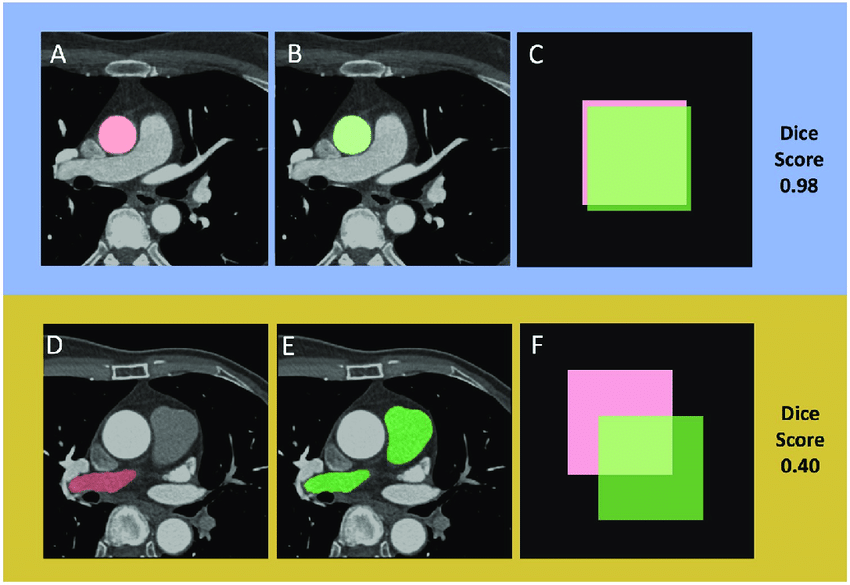

\begin{equation}
    \text{dice score} = \frac{2*\text{broj true pozitiva}}{2*\text{broj true pozitiva}+\text{broj false pozitiva}+2*\text{broj false negativa}}
  \end{equation}